In [2]:
import json
rs = [4, 8, 16, 32, 64, 128]
filenames = [f't5_evaluation_results_finetune_r{r}.json' for r in rs]
rougeLsums = []
bert_F1s = []
for filename in filenames:
    with open(filename, 'r') as f:
        fulldic = json.load(f)
        rougeLsums.append(fulldic['rouge']['rougeLsum'])
        bert_F1s.append(fulldic['bert']['F1'])

print(rougeLsums)
print(bert_F1s)     


[0.2453424242405886, 0.2513821061465172, 0.2547683626108541, 0.2589646199544078, 0.262433191945621, 0.2627301666733204]
[0.7360491665841226, 0.7382908597353081, 0.7401046804730564, 0.7416607239714594, 0.7425250473598325, 0.7432146558777742]


(0.7, 0.8)

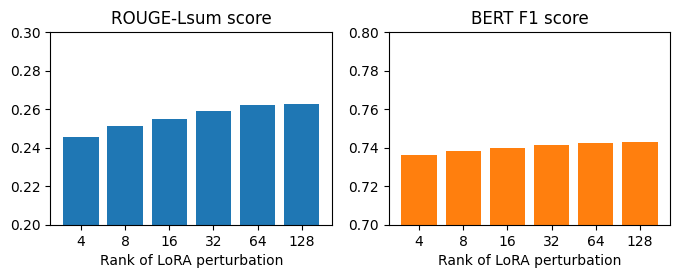

In [3]:
import matplotlib.pyplot as plt
import numpy as np


# Setting up the figure
fig, axes = plt.subplots(1, 2, figsize=(8, 2.5), sharey=False)

# Colors for before and after fine-tuning
colors = ["#1f77b4", "#ff7f0e"]

# Plotting the data
xs = np.arange(len(rs))
axes[0].set_title("ROUGE-Lsum score")
axes[1].set_title("BERT F1 score")
axes[0].set_xticks(xs)
axes[0].set_xticklabels(rs)
axes[1].set_xticks(xs)
axes[1].set_xticklabels(rs)
axes[0].set_xlabel("Rank of LoRA perturbation")
axes[1].set_xlabel("Rank of LoRA perturbation")
axes[0].bar(xs, rougeLsums, label="ROUGE-Lsum", color=colors[0] )
axes[1].bar(xs, bert_F1s, label="BERT F1", color=colors[1])
axes[0].set_ylim(.2, .3)
axes[1].set_ylim(.7, .8)

